In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
col=df.columns
for col in df:
    print(df[col].unique())

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 99]
[  0  94 168  88 543 846 175 230  83  96 235 

In the dataset the variables except Pregnancies and Outcome cannot have value as 0,
because it is not possible to have 0 Glucose Level or to have 0 Blood Pressure. So, this
will be counted as incorrect information
Checking the count of value 0 in the variables


In [9]:
for col in df:
    c=0
    for i in df[col]:
        if i==0:
            c=c+1
    print(col,c)        

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


Replacing the 0 value in the variables - Glucose, BloodPressure, SkinThickness, Insulin,BMI

In [10]:
zcol=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [11]:
for i in zcol:
    df[i].replace({0:df[i].mean()},inplace=True)

In [12]:
for col in df:
    c=0
    for i in df[col]:
        if i==0:
            c=c+1
    print(col,c) 

Pregnancies 111
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0
DiabetesPedigreeFunction 0
Age 0
Outcome 500


Descriptive Statistics

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# EDA

Exploratory Data Analysis
In the exploratory data analysis, I will be looking at the distribution of the data, the
correlation between the features, and the relationship between the features and the
target variable. I will start by looking at the distribution of the data, followed by
relationship between the target variable and independent variables.


Text(0.5, 1.0, 'Diabetic and Non-Diabetic')

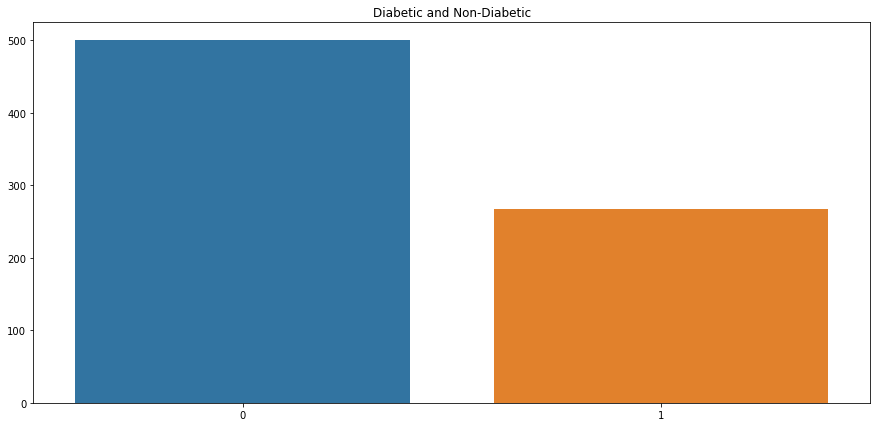

In [14]:
plt.figure(figsize=(15,7))
sns.barplot(x=df['Outcome'].value_counts().index,y=df['Outcome'].value_counts().values).set_title("Diabetic and Non-Diabetic")

<AxesSubplot:xlabel='Age', ylabel='Count'>

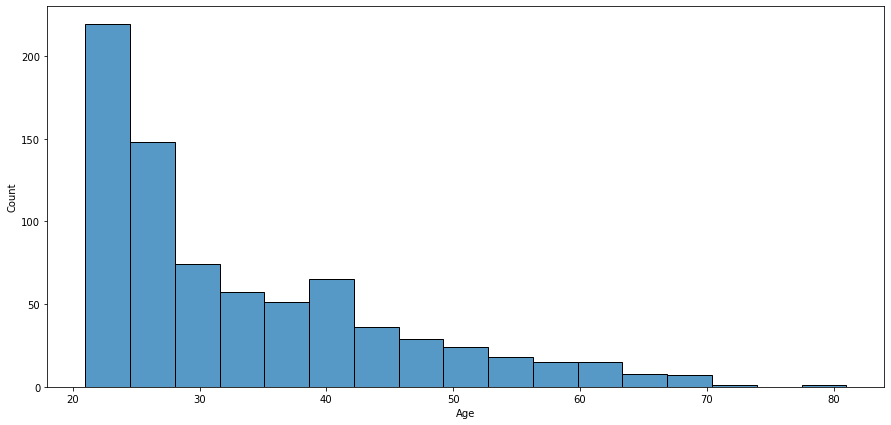

In [15]:
plt.figure(figsize=(15,7))
sns.histplot(df['Age'])

# Age Distribution and Diabetes

d:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


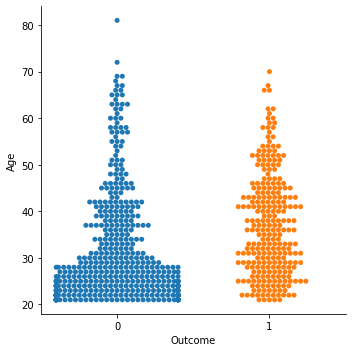

In [16]:
sns.catplot(x="Outcome", y="Age", kind="swarm", data=df)

From the graph, it is quite clear that majority of the patients are adult within the age
group of 20-30 years. Patients in the age range 40-55 years are more prone to diabetes,
as compared to other age groups. Since the number adults in the age group 20-30 years
is more, the number of patients with diabetes is also more as compared of other age
groups

# Pregnancies and Diabetes

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

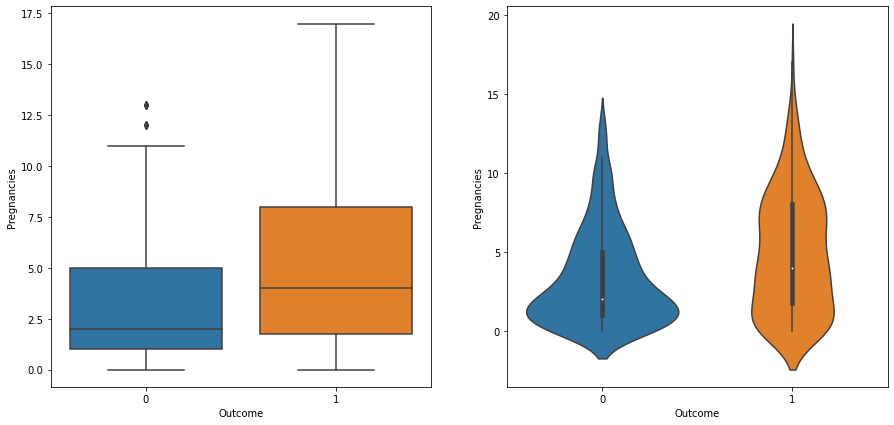

In [17]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(x=df['Outcome'],y=df['Pregnancies'],ax=ax[0])
sns.violinplot(x=df['Outcome'],y=df['Pregnancies'],ax=ax[1])

Both boxplot and violinplot shows strange relation between the number of preganacies
and diabetes. According to the graphs the increased number of pregnancies highlights
increased risk of diabetes

# Glucose and Diabetes

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

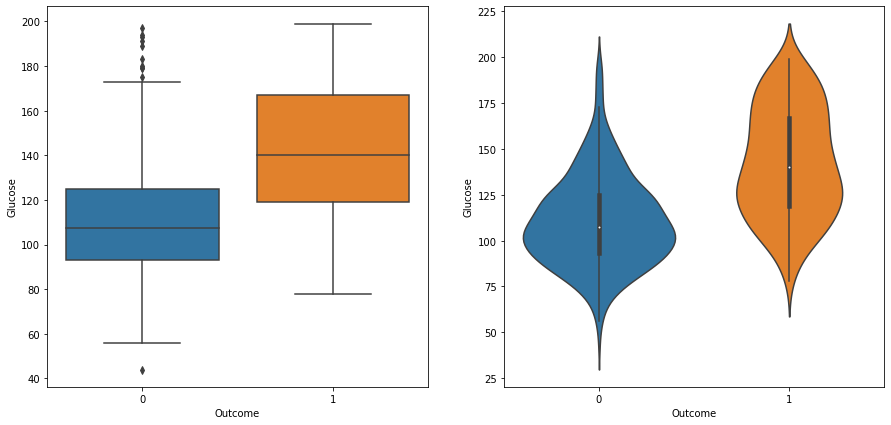

In [18]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(x=df['Outcome'],y=df['Glucose'],ax=ax[0])
sns.violinplot(x=df['Outcome'],y=df['Glucose'],ax=ax[1])

Glucose level plays a major role in determine whether the patient is diabetic or not. The
patients with median gluocse level less than 120 are more likely to be non-diabetic. The
patients with median gluocse level greather than 140 are more likely to be diabetic.
Therefore, high gluocose levels is a good indicator of diabetes.


# Blood Pressuse and Diabetes

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

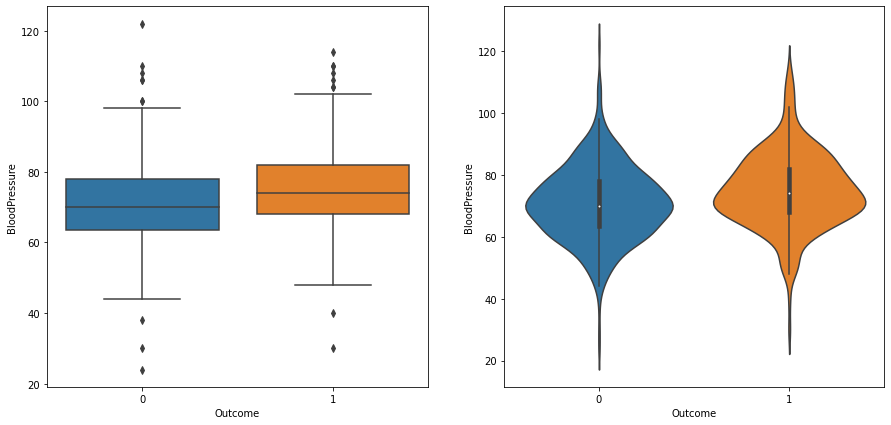

In [19]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(x=df['Outcome'],y=df['BloodPressure'],ax=ax[0])
sns.violinplot(x=df['Outcome'],y=df['BloodPressure'],ax=ax[1])

Both the boxplot and voilinplot provides clear understanding of the realtion between the
blood pressure and diabetes. The boxplot shows that the median of the blood pressure
for the diabetic patients is slightly higher than the non-diabetic patients. The voilinplot
shows that the distribution of the blood pressure for the diabetic patients is slightly
higher than the non-diabetic patients. But there has been not enough evidence to
conclude that the blood pressure is a good predictor of diabetes.

# Skin Thickness and Diabetes

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

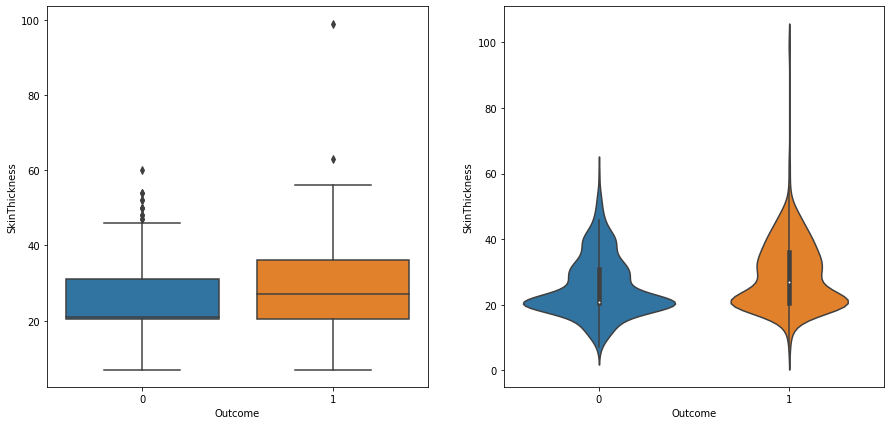

In [20]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(x=df['Outcome'],y=df['SkinThickness'],ax=ax[0])
sns.violinplot(x=df['Outcome'],y=df['SkinThickness'],ax=ax[1])

Here both the boxplot and violinplot reveals the effect of diabetes on skin thickness. As
obserevd in the boxplot, the median of skin thickness is higher for the diabetic patients
than the non-diabetic patients, where non diabetic patients have median skin thickness
near 20 in comparison to skin thickness nearly 30 in diabetic patients. The voilinpplot
shows the distribution of patients' skin thickness amoung the patients, where the non
diabetic ones have greater distribution near 20 and diabetic much less distribution near
20 and increased distribution near 30. Therefore, skin thickness can be a indicator of
diabetes

# Insulin and Diabetes

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

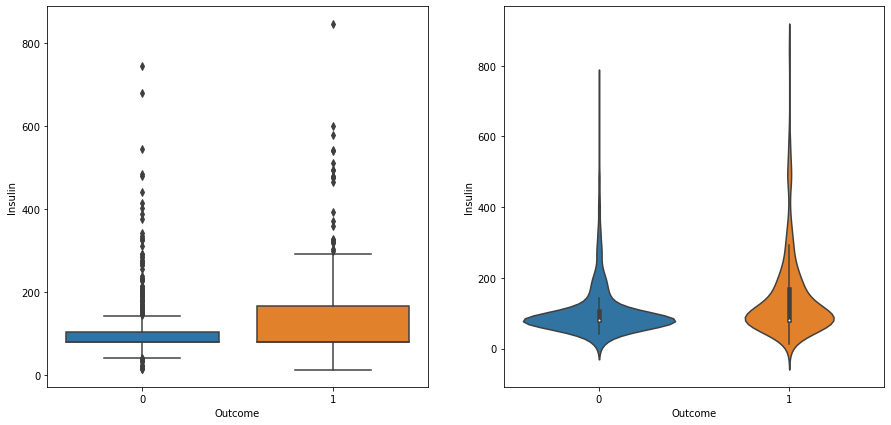

In [21]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(x=df['Outcome'],y=df['Insulin'],ax=ax[0])
sns.violinplot(x=df['Outcome'],y=df['Insulin'],ax=ax[1])

Insulin is a major body hormone that regulates glucose metabolism. Insulin is required
for the body to efficiently use sugars, fats and proteins. Any change in insulin amount in
the body would result in change glucose levels as well. Here the boxplot and violinplot
shows the distribution of insulin level in patients. In non diabetic patients the insulin level
is near to 100, whereas in diabetic patients the insulin level is near to 200. In the
voilinplot we can see that the distribution of insulin level in non diabetic patients is more
spread out near 100, whereas in diabetic patients the distribution is contracted and
shows a little bit spread in higher insulin levels. This shows that the insulin level is a good
indicator of diabetes.

# BMI and Diabetes

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

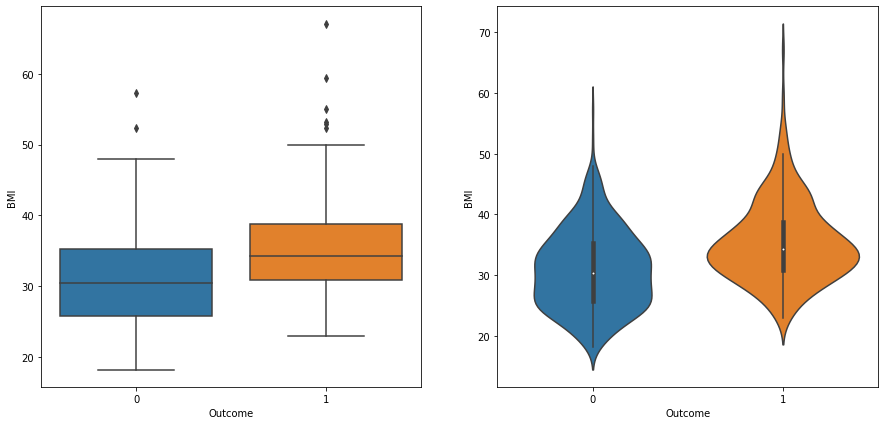

In [22]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(x=df['Outcome'],y=df['BMI'],ax=ax[0])
sns.violinplot(x=df['Outcome'],y=df['BMI'],ax=ax[1])

Both graphs highlights the role of BMI in diabetes prediction. Non diabetic patients have
a normal BMI within the range of 25-35 whereas the diabetic patients have a BMI greater
than 35. The violinplot reveals the BMI distribution, where the non dibetic patients have a
increased spread from 25 to 35 with narrows after 35. However in diabetic patients there 
is increased spread at 35 and increased spread 45-50 as compared to non diabetic
patients.Therefore BMI is a good predictor of diabetes and obese people are more likely
to be diabetic

# Diabetes Pedigree Function and Diabetes Outcome

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

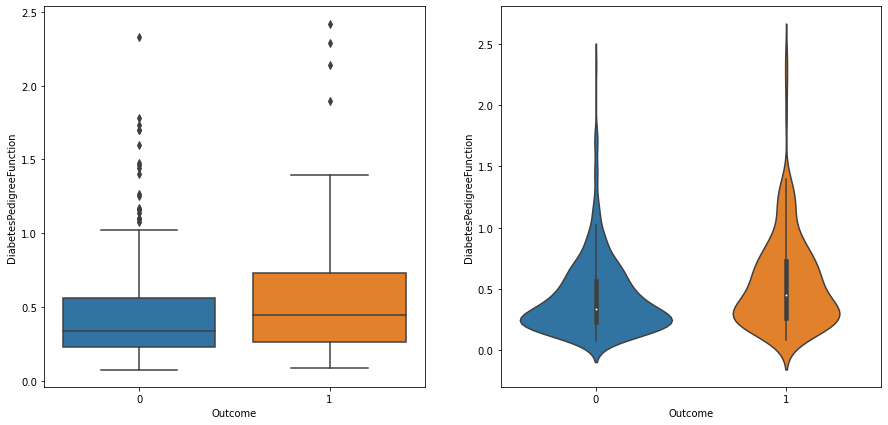

In [23]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(x=df['Outcome'],y=df['DiabetesPedigreeFunction'],ax=ax[0])
sns.violinplot(x=df['Outcome'],y=df['DiabetesPedigreeFunction'],ax=ax[1])

Diabetes Pedigree Function (DPF) calculates diabetes likelihood depending on the
subject's age and his/her diabetic family history. From the boxplot, the patients with
lower DPF, are much less likely to have diabetes. The patients with higher DPF, are much
more likely to have diabetes. In the violinplot, majority of the non diabetic patients have
a DPF of 0.25-0.35, whereas the diabetic patients have a increased DPF, which is shown
by the their distribution in the violinplot where there is a increased spread in the DPF
from 0.5 -1.5. Therefore the DPF is a good indicator of diabetes

# Pairplot

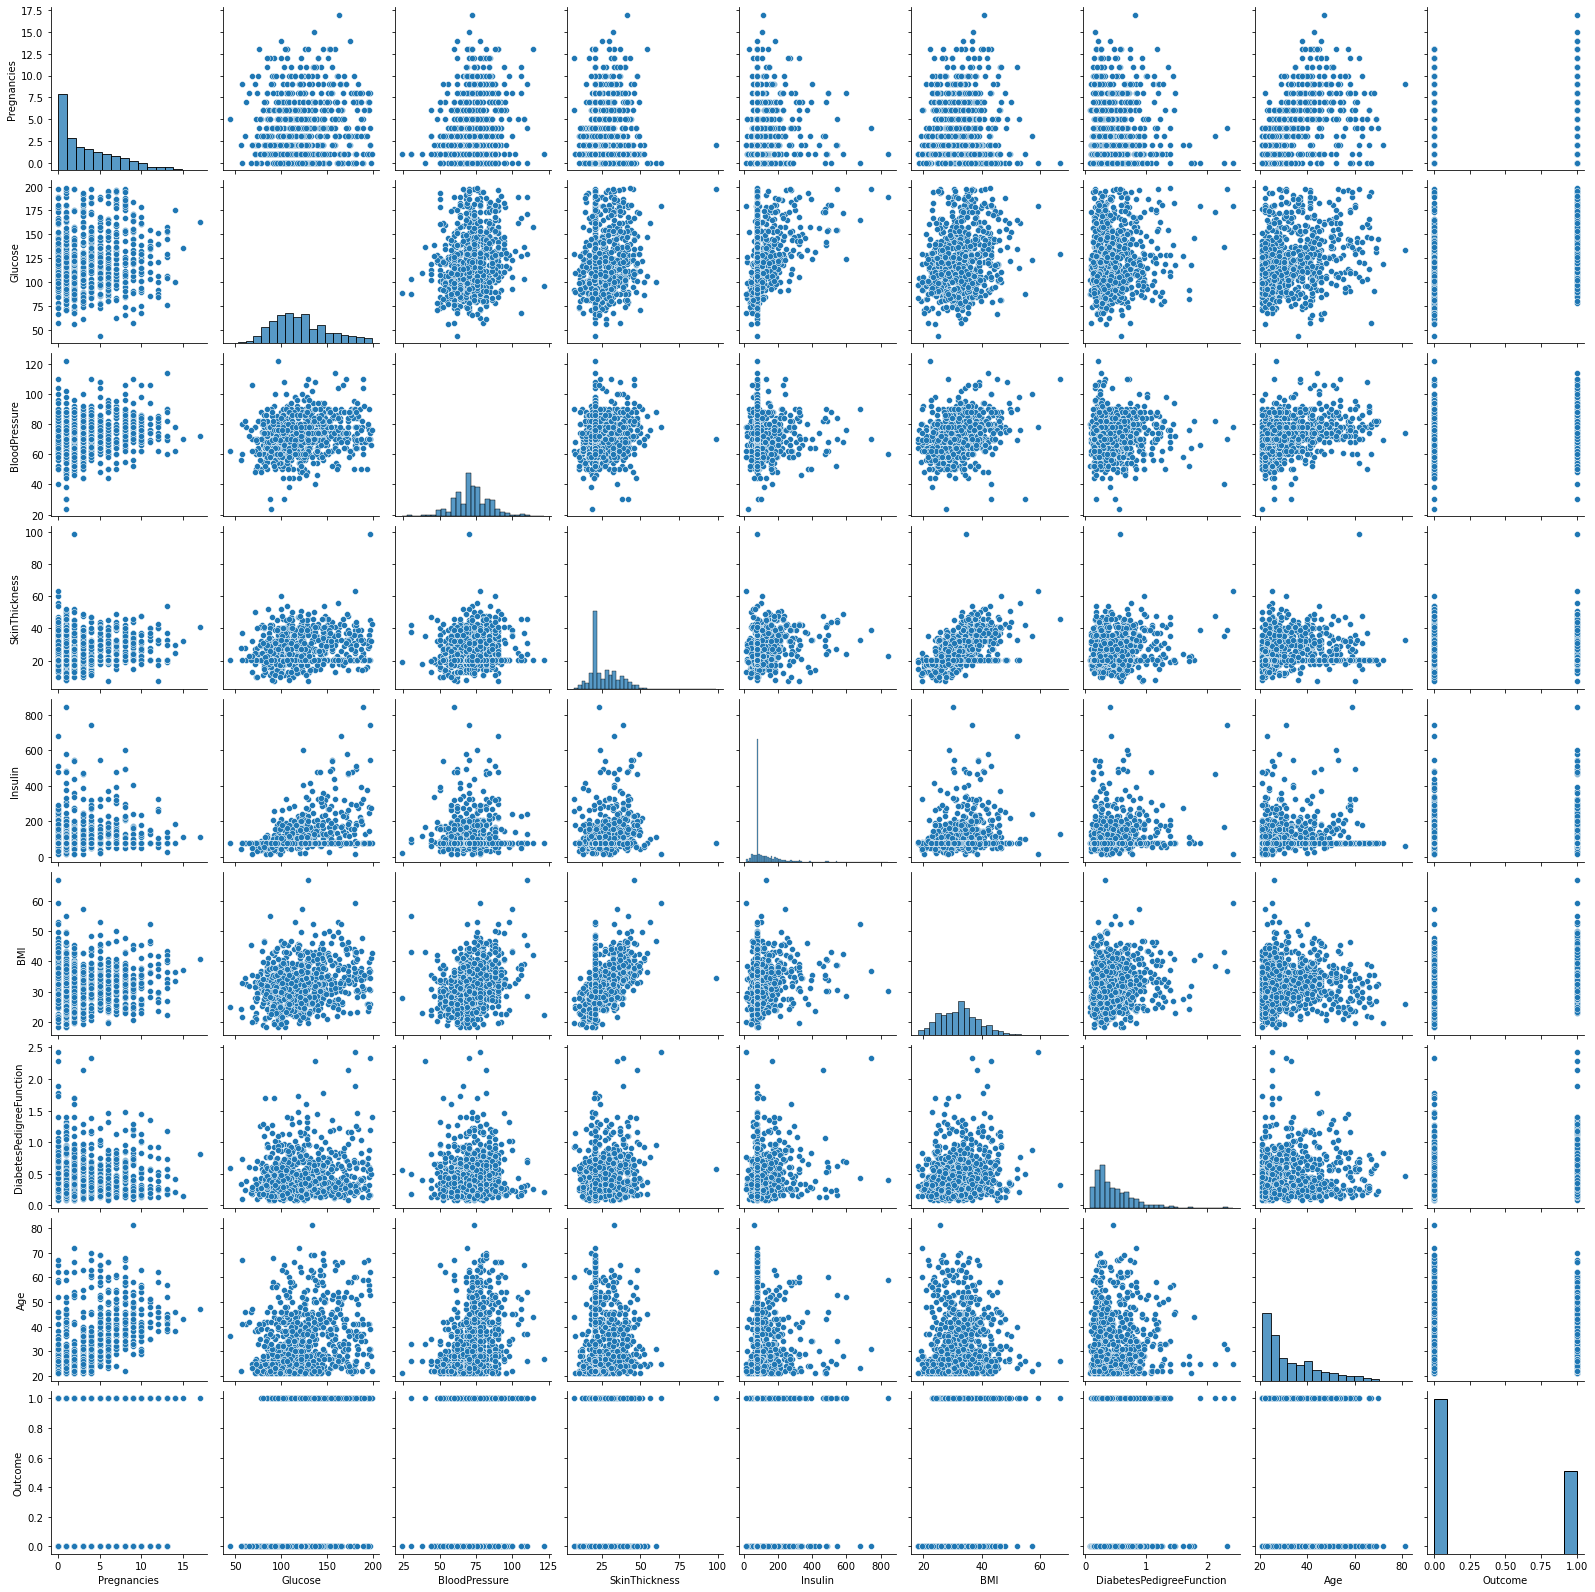

In [24]:
sns.pairplot(df)

# Age ,Blood Pressure and Diabetes

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

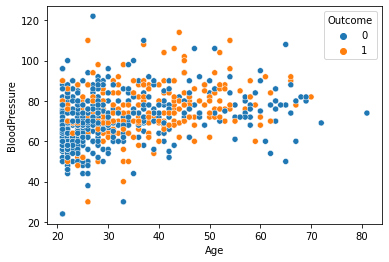

In [25]:
sns.scatterplot(x=df['Age'],y=df['BloodPressure'],hue=df['Outcome'])

As a person grow old there has high chances of high blood pressure and blood pressure is not actually good for prediction
of Diabetic patient as the diabetic patients are from every range of blood pressure
As a person age he has higher chances of being diabetic that is clear from the visual

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

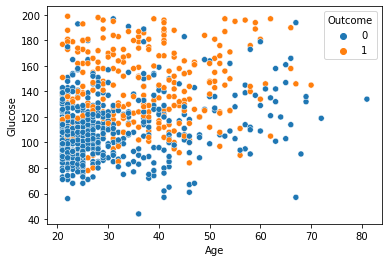

In [26]:
sns.scatterplot(x=df['Age'],y=df['Glucose'],hue=df['Outcome'])

From range of age 20 -30 most of the people have low level of glucose i.e. around 70-130 and less number of people with higher range of glucose i.e. around 130-200 in that range
As a person age glucose level also increses and the person has higher chances of being Diabetic

<AxesSubplot:xlabel='SkinThickness', ylabel='BMI'>

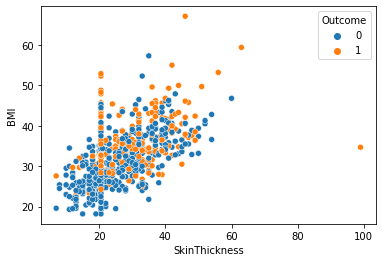

In [27]:
sns.scatterplot(x=df['SkinThickness'],y=df['BMI'],hue=df['Outcome'])

person having high skin thickness has higher BMI which also results in higher chances of Patient being Diabetic

<AxesSubplot:>

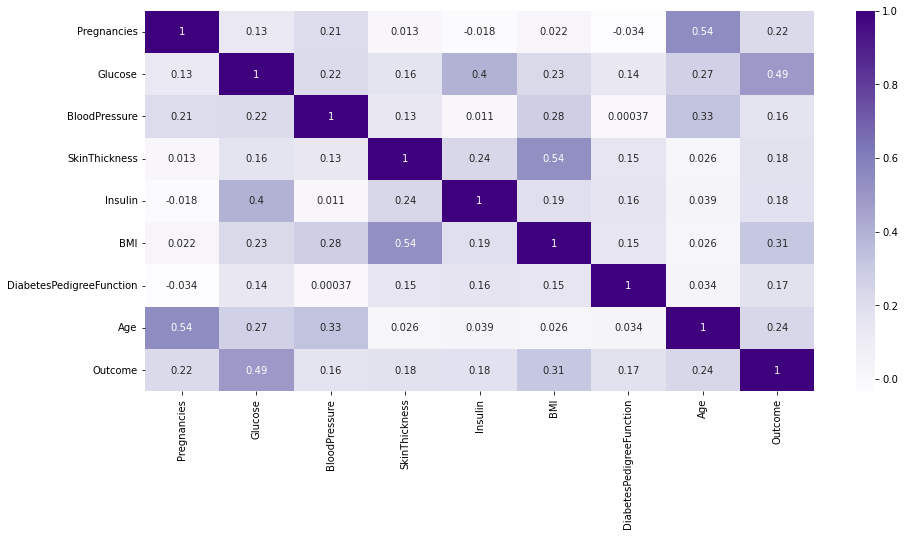

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='Purples')

# Remove Outliers

In [29]:
col=df.columns

In [30]:
for col in df:
    q1=np.percentile(df,25)
    q3=np.percentile(df,75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]


In [31]:
df.shape

(646, 9)

In [32]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

# Balancing the imbalance dataset

In [33]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_bal,y_bal=smote.fit_resample(X,y)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (d:\Anaconda\lib\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
sns.countplot(df,x=y_bal)

: 

# Scaling Features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

: 

In [ ]:
scaler.fit(X_bal)

: 

In [ ]:
X_scaled=scaler.transform(X_bal)

: 

In [ ]:
X_new=pd.DataFrame(X_scaled,columns=X_bal.columns)

: 

# Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_new,y_bal,test_size=0.3,random_state=42)

: 

: 

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(max_iter=500)

: 

In [ ]:
lr_model.fit(X_train,y_train)

: 

In [ ]:
lr_pred=lr_model.predict(X_test)

: 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_pred))

: 

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,lr_pred))

: 

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

: 

rfc_parameters={'criterion':['gini','entropy'],
       'max_depth':[4,6,8],
       'min_samples_split':[2,4,6],
       'min_samples_leaf':[1,2,3],
       'max_features':['sqrt','log2'],        
       }
from sklearn.model_selection import GridSearchCV
rfc_grid_search=GridSearchCV(rfc,rfc_parameters,cv=10,scoring='f1_macro')
rfc_grid_search.fit(X_train_new,y_bal)
print('The Parameters are:',rfc_grid_search.best_params_)

rfc= RandomForestClassifier(criterion=rfc_grid_search.best_params_.get('criterion'),
                                  max_depth = rfc_grid_search.best_params_.get('max_depth'),
                                  max_features = rfc_grid_search.best_params_.get('max_features'),
                                  min_samples_leaf = rfc_grid_search.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rfc_grid_search.best_params_.get('min_samples_split'),
                                  random_state = 42,class_weight={0:2,1:5})

In [ ]:
rfc.fit(X_train,y_train)

: 

In [ ]:
rfc.score(X_test,y_test)

: 

In [ ]:
rfc_pred=rfc.predict(X_test)

: 

In [ ]:
print(classification_report(y_test,rfc_pred))

: 

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

: 

## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',random_state=0)
svm

: 

In [ ]:
svm.fit(X_train,y_train)

: 

In [ ]:
svm.score(X_test,y_test)

: 

In [ ]:
svm_pred=svm.predict(X_test)

: 

In [ ]:
print(classification_report(y_test,svm_pred))

: 

In [ ]:
print(confusion_matrix(y_test,svm_pred))

: 

# ExtraTrees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()

: 

In [ ]:
etc.fit(X_train,y_train)

: 

In [ ]:
etc_pred=svm.predict(X_test)

: 

In [ ]:
print(classification_report(y_test,svm_pred))

: 

# Model Evaluation

### Evaluating Logistic Regression Model

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

: 

In [ ]:
sns.distplot(y_test,color='red',label='Actual Value',hist=False)
sns.distplot(lr_pred,color='blue',label='Predicted Values',hist=False)
plt.title('Actual and Predicted Value Logistic Regression')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.legend()

: 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout

: 

In [ ]:
n_cols=X_bal.columns.value_counts().sum()

: 

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(n_cols,)),
    layers.Dropout(0.2),  
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),  
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

: 

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

: 

In [ ]:
early_stopping=EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=False)

: 

In [ ]:
history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_split=0.2,callbacks=[early_stopping])

: 

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


: 

In [ ]:
ann_log=model.predict(X_test)

: 

In [ ]:
ann_pred=np.where(ann_log>0.5,1,0)

: 

In [ ]:
print(classification_report(y_test,ann_pred))

: 

In [ ]:
print(confusion_matrix(y_test,ann_pred))

: 

: 